In [1]:
# Import Dependencies
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from statsmodels.multivariate.pca import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Car Prices
Keywords: multivariate, regression.

## Description
An automobile company aspires to enter the market by setting up their manufacturing unit and producing cars. The goal of this analysis is to understand the factors on which the pricing of cars depends. Which variables are significant in predicting the price of a car.

## Source
https://archive.ics.uci.edu/ml/datasets/Automobile

In [3]:
# Read the csv file into a pandas DataFrame
### YOUR CODE HERE
df = pd.read_csv('../Resources/CarPrices.csv')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.corr()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.194311,1.000000,-0.401397,-0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,-0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,-0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,0.398568,0.207168,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,-0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,-0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,-0.212679,0.234539,0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,-0.233880,0.300567,0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,...,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


In [6]:
# Select our independent X variables, and our dependent y variable. 
### YOUR CODE HERE
X = df[['fueltype','wheelbase','carlength','carwidth','compressionratio','highwaympg']]
y = df['aspiration']

In [7]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(153, 6) (52, 6) (153,) (52,)


## Multiple Linear Regression

In [9]:
# Create a LinearRegression model and fit it to the training data

### YOUR CODE HERE
# Create the Linear Regression model object
model =LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
# Use the X_train & y_train to calculate the R2 in-sample value (training data)

### YOUR CODE HERE
r2 = model.score(X_train, y_train)

print(f"R2: {r2}")

R2: 0.575130694576037


In [11]:
# Use the X_test & y_test to calculate the R2 out-of-sample value (testing data)

### YOUR CODE HERE
r2 = model.score(X_test, y_test)

print(f"R2: {r2}")

R2: 0.16995564332979285


## Principal Component Analysis

In [14]:
# Run Principal Component Analysis and create a Components DataFrame
# Standardize set to True to standardize and create covariance matrix
# Method set to `eig` to perform eigendecomposition

### YOUR CODE HERE
pca = PCA(X, standardize=True, method='eig')
components_df = pca.factors

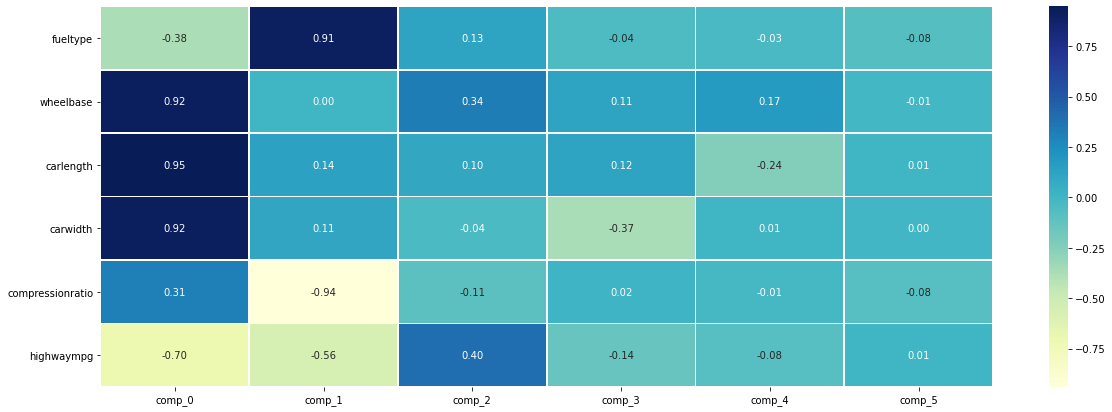

In [16]:
### DO NOT EDIT

# Combine the X varaibles and new principal compenents
combined_df = pd.concat([X, components_df], axis=1)

# Create a correlation matrix of all X variables and principal components
correlation = combined_df.corr()

# Creat a matrix showing the correlation between:
# Features vs Principal Components
# Remove the parts of the output to keep the correlation between features and principal components
# Keep Rows up till components: correlation[:-len(components_df.columns)]
# Keep Columns starting with compenents: .loc[:, 'comp_00':]
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_0':]

# Plot Features vs Principal Components correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

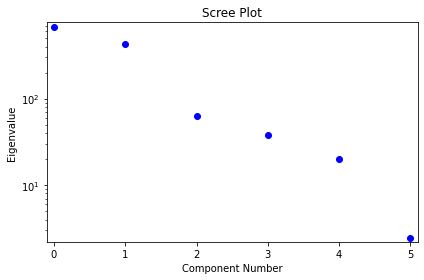

In [17]:
# Create a Scree Plot

### YOUR CODE HERE
pca.plot_scree()
plt.show()

In [18]:
# Print the Cumulative Variance Explained

### YOUR CODE HERE
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])
print(cumulative_variance_explained)

   cumulative_var
0        0.000000
1        0.554657
2        0.899411
3        0.951345
4        0.981852
5        0.997991
6        1.000000


In [21]:
# Update `n` to be the varible that reaches 80% variance explained

n = 'comp_3'

cumulative_df =  components_df.loc[:, :n]
cumulative_df.head()

,comp_0,comp_1,comp_2,comp_3
0,-0.053881,0.024228,-0.161713,0.046977
1,-0.053881,0.024228,-0.161713,0.046977
2,-0.016241,0.030536,-0.102550,0.015202
3,0.008899,0.014895,0.016784,-0.001882
4,0.023294,0.053429,-0.081916,0.041560


In [22]:
# Split the data into training and testing with the new cumulative_df
X_train, X_test, y_train, y_test = train_test_split(cumulative_df, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(153, 4) (52, 4) (153,) (52,)


## PCA Multiple Linear Regression

In [24]:
# Create a new LinearRegression model and fit it to the training data

### YOUR CODE HERE
model =LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
# Use the new X_train & y_train to calculate the R2 in-sample value (training data)

### YOUR CODE HERE
r2 = model.score(X_train, y_train)

print(f"R2: {r2}")

R2: 0.29583560970826617


In [26]:
# Use the new X_test & y_test to calculate the R2 out-of-sample value (testing data)

### YOUR CODE HERE
r2 = model.score(X_test, y_test)

print(f"R2: {r2}")

R2: -0.08157213171797628
